In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('KC_data.csv')

In [4]:
df

,year,housing_units,med_home_val,population,med_income,Unnamed: 5,Unnamed: 6
0,2000,742237,225000,1737081,53200,NaN,NaN
1,2001,750607,235000,1755690,54887,NaN,NaN
2,2002,758977,249000,1774300,55082,NaN,NaN
3,2003,767347,265000,1779300,56881,NaN,NaN
4,2004,775717,284950,1788300,55114,NaN,NaN
5,2005,784087,332000,1808300,58370,NaN,NaN
6,2006,792457,378500,1835300,63489,NaN,NaN
7,2007,800827,397000,1861300,67010,NaN,NaN
8,2008,809197,394900,1881212,70193,NaN,NaN
9,2009,817572,365000,1922645,67246,NaN,NaN


In [5]:
#Removing unneccessary columns
df.drop(columns = ['Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)

In [6]:
#setting 'year' as the index
df.set_index('year', inplace = True)

In [7]:
df = df.astype(int)

In [8]:
df.dtypes

housing_units    int64
med_home_val     int64
population       int64
med_income       int64
dtype: object

In [9]:
df

,housing_units,med_home_val,population,med_income
year,,,,
2000,742237,225000,1737081,53200
2001,750607,235000,1755690,54887
2002,758977,249000,1774300,55082
2003,767347,265000,1779300,56881
2004,775717,284950,1788300,55114
2005,784087,332000,1808300,58370
2006,792457,378500,1835300,63489
2007,800827,397000,1861300,67010
2008,809197,394900,1881212,70193


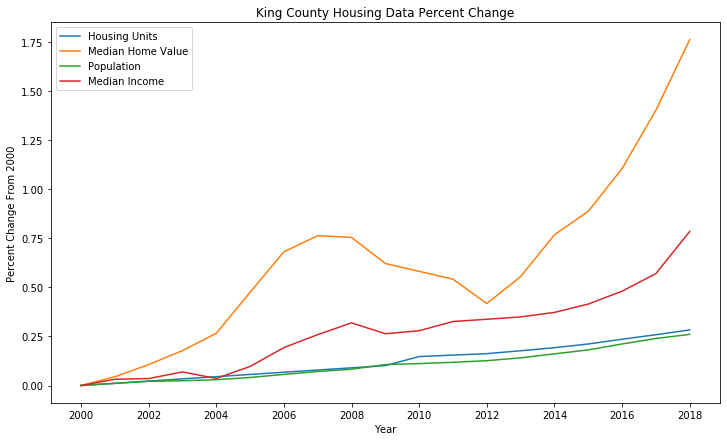

In [10]:
#Creating multiple line graph to observe percent change differences
plt.figure(figsize = (12, 7))
for c in df.columns:
    labels = ['Housing Units', 'Median Home Value', 'Population', 'Median Income']
    plt.plot(df.index, df[c] / df[c].iloc[0] - 1)
plt.legend(labels)
plt.xticks(range(2000, 2019, 2))
plt.xlabel("Year")
plt.ylabel("Percent Change From 2000")
plt.title ('King County Housing Data Percent Change')
plt.savefig('kc_percent_change', bbox_inches='tight');
#code credit: Richard

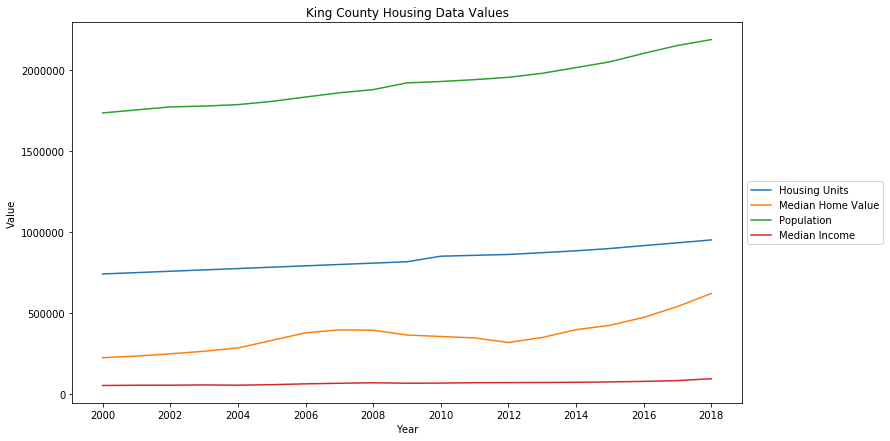

In [11]:
#Creating multiple line graph to observe raw data
labels = ['Housing Units', 'Median Home Value', 'Population', 'Median Income']
plt.figure(figsize = (12, 7))
plt.plot(df, data = df[['housing_units', 'med_home_val', 'population', 'med_income']])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(2000, 2019, 2))
plt.xlabel("Year")
plt.ylabel("Value")
plt.title ('King County Housing Data Values')
plt.savefig('kc_all_vals', bbox_inches='tight')

## Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating X, y variables and then creating standard scaler, performing train_test_split, then fit/transforming.
X = df.drop('med_home_val', 1)
y = df['med_home_val']

In [14]:
ss = StandardScaler()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)

In [16]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [17]:
#Creating the model, then fitting
model = LinearRegression()

In [18]:
model.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(f'Linear Regression Train Accuracy: {round(model.score(X_train_ss, y_train),4)}')
print(f'Linear Regression Test Accuracy: {round(model.score(X_test_ss, y_test),4)}')

Linear Regression Train Accuracy: 0.9523
Linear Regression Test Accuracy: 0.8314


In [20]:
y_pred = model.predict(X_train_ss)

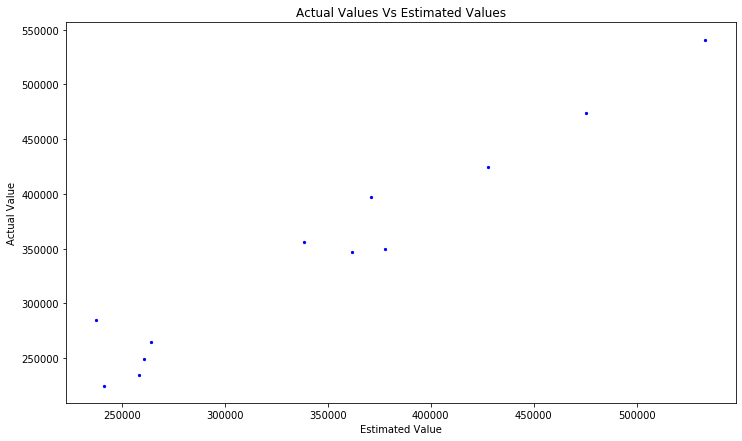

In [22]:
#Checking my y predictions versus actual y values on scatter plot
plt.figure(figsize = (12, 7))
plt.scatter(y_pred, y_train, s=5, color='blue')
plt.xlabel("Estimated Value")
plt.ylabel("Actual Value")
plt.title ('Actual Values Vs Estimated Values')
plt.savefig('accuracy', bbox_inches='tight')

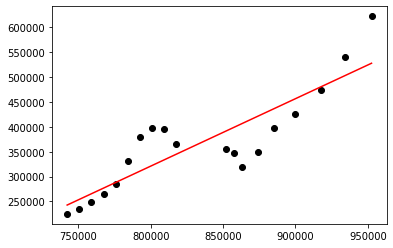

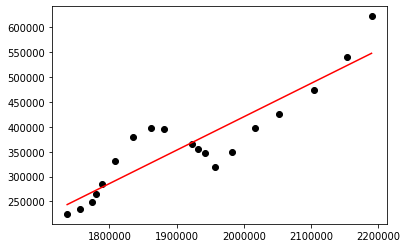

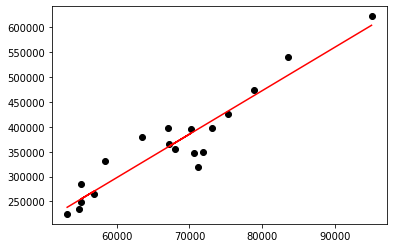

In [77]:
#Checking how each variable aligns with the best fit line
lr = LinearRegression()
for c in X.columns:
    lr.fit(X[[c]], y)
    plt.scatter(X[c], y, color = 'k')
    plt.plot(X[c], lr.predict(X[[c]]), color = 'r')
    plt.show()

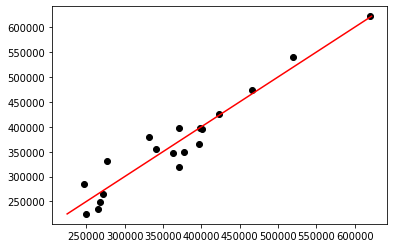

In [78]:
#Observing how well my variables combined align with the line of best fit
lr.fit(X, y)
plt.scatter(lr.predict(X), y, color = 'k')
plt.plot(np.linspace(y.min(), y.max()), np.linspace(y.min(), y.max()), color = 'r')


## Random Forest Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)

In [28]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [29]:
#instantiating my model and setting up parameters for Gridsearch
n_estimators = [6, 20, 60, 100, 200]
rf_model = RandomForestRegressor()


rf_params = {'n_estimators': n_estimators}

In [30]:
#Creating my gridsearch, and fitting it below
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                              rf_params,
                              cv=5,
                              verbose=1)

In [31]:
rf_gridsearch.fit(X_train_ss, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.0s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
#Checking the best scorew and best parameters
print(f'Best Score: {round(rf_gridsearch.best_score_,4)}')
print(f'Best Parameters: {(rf_gridsearch.best_params_)}')
best_rf_params = rf_gridsearch.best_params_

Best Score: 0.6344
Best Parameters: {'n_estimators': 100}


In [45]:
#Obtaining accuracy scores for train and test
rf_model = rf_gridsearch.best_estimator_
print(f'Random Forest Train Accuracy: {round(rf_model.score(X_train_ss, y_train),4)}')
print(f'Random Forest Test Accuracy: {round(rf_model.score(X_test_ss, y_test),4)}')

Random Forest Train Accuracy: 0.9844
Random Forest Test Accuracy: 0.7026


In [47]:
y_pred_rf = rf_model.predict(X_train_ss)

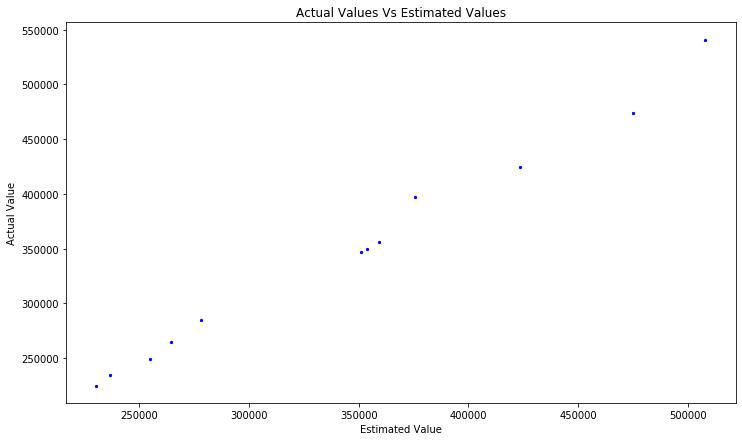

In [48]:
#Checking my predictions for y predictions versus actual y
plt.figure(figsize = (12, 7))
plt.scatter(y_pred_rf, y_train, s=5, color='blue')
plt.xlabel("Estimated Value")
plt.ylabel("Actual Value")
plt.title ('Actual Values Vs Estimated Values')
plt.savefig('accuracy', bbox_inches='tight')

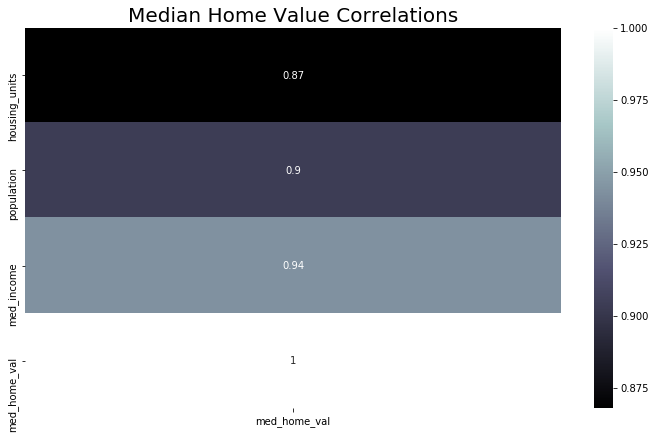

In [49]:
#seaborn vertical heatmap to see how each variable correlates to the output 
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr()[['med_home_val']].sort_values('med_home_val'), annot=True, cmap='bone');
plt.title('Median Home Value Correlations', fontsize=20);
plt.savefig('corr', bbox_inches='tight')